In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

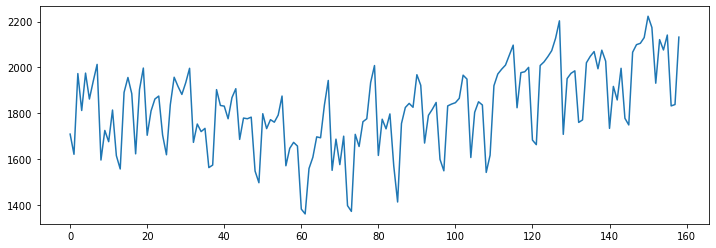

In [54]:
walmart = pd.read_csv('footfalls.csv')
walmart.Footfalls.plot(figsize=(12,4));

In [5]:
walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
walmart['Date'] = pd.to_datetime(walmart.Month,format="%b-%y")
walmart['month'] = walmart.Date.dt.strftime("%b") #month extraction
walmart['year'] = walmart.Date.dt.strftime("%y") #year extraction
#walmart['day'] =  walmart.Date.dt.strftime("%d") #day extraction
#walmart['weekdat'] =  walmart.Date.dt.strftime("%A") #weekday extraction
walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,03
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,03
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,04
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,04


month   Apr   Aug   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov   Oct   Sep
year                                                                         
00     1971  2097  2000  1617  1542  2054  2010  1920  1992  1981  1977  1824
01     2024  2203  1985  1663  1683  2127  2073  2008  2047  1974  1951  1708
02     2048  2027  1996  1771  1760  2075  1994  2020  2069  1858  1917  1734
03     2099  2174  2141  1749  1778  2223  2130  2066  2105  2076  2121  1931
04        0     0     0  1838  1832     0     0  2132     0     0     0     0
91     1812  2013  1814  1621  1709  1940  1862  1973  1975  1676  1725  1596
92     1956  1997  1875  1557  1615  1903  1623  1891  1885  1862  1810  1704
93     1957  1996  1734  1619  1705  1933  1882  1837  1917  1720  1753  1673
94     1834  1907  1783  1574  1563  1868  1776  1903  1831  1776  1779  1686
95     1733  1875  1657  1497  1548  1792  1761  1798  1772  1673  1647  1571
96     1608  1943  1700  1361  1382  1836  1693  1559  1697  157

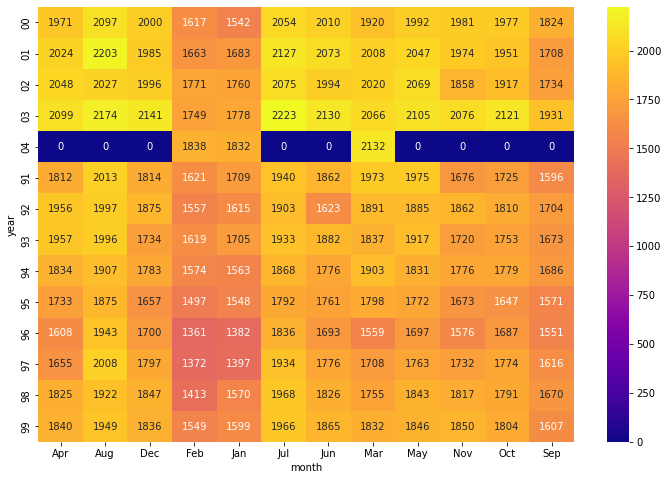

In [24]:
#heatmat
plt.figure(figsize=(12,8))
heatmat_Y_M = pd.pivot_table(data=walmart,values='Footfalls',index='year',columns='month',
                             aggfunc="mean",fill_value=0)
print(heatmat_Y_M)
sns.heatmap(heatmat_Y_M,annot=True,fmt = "g",cmap='plasma');

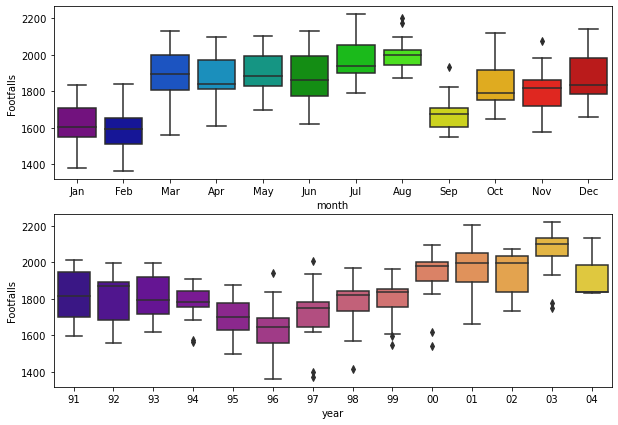

In [21]:
#Boxplot
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=walmart,palette='nipy_spectral')
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=walmart,palette='plasma');

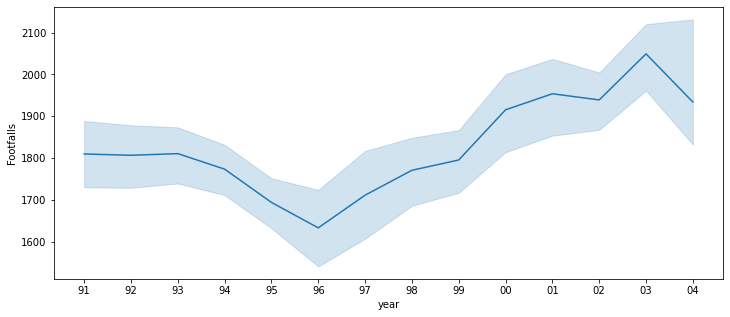

In [25]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='Footfalls',data=walmart);

## Splitting the data

In [26]:
len(walmart)

159

In [32]:
Train = walmart.head(147)
Test = walmart.tail(12)

## Using Various model and finding the best one

In [33]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Footfalls~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462546

In [34]:
#Exponential

Exp = smf.ols('log_footfalls~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.05263569547816

In [35]:
#Quadratic 

Quad = smf.ols('Footfalls~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356495

In [36]:
#Additive seasonality 

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.664390056878

In [37]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.60724584169076

In [38]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325266299

In [39]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.7672678748924

In [41]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


# Predicting for new time data

In [42]:
predict_data = pd.read_csv('Predict_new.csv')
predict_data.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896


In [45]:
#final model(Additive Seasonality Quadratic )
model_final = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=walmart).fit()

In [46]:
pred_new  = pd.Series(model_final.predict(predict_data))
pred_new

0     2193.807626
1     2229.969736
2     2200.670308
3     2311.293957
4     2356.071452
5     2036.848947
6     2187.241826
7     2181.480859
8     2234.104508
9     1999.997498
10    1972.995363
11    2280.493228
dtype: float64

In [47]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [51]:
visualize = pd.concat([walmart,predict_data])
visualize

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year,forecasted_Footfalls
0,Jan-91,1709.0,1,7.443664,1,1,0,0,0,0,...,0,0,0,0,0,0,1991-01-01,Jan,91,NaN
1,Feb-91,1621.0,2,7.390799,4,0,1,0,0,0,...,0,0,0,0,0,0,1991-02-01,Feb,91,NaN
2,Mar-91,1973.0,3,7.587311,9,0,0,1,0,0,...,0,0,0,0,0,0,1991-03-01,Mar,91,NaN
3,Apr-91,1812.0,4,7.502186,16,0,0,0,1,0,...,0,0,0,0,0,0,1991-04-01,Apr,91,NaN
4,May-91,1975.0,5,7.588324,25,0,0,0,0,1,...,0,0,0,0,0,0,1991-05-01,May,91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,04-Nov,NaN,167,NaN,27889,0,0,0,0,0,...,0,0,0,0,1,0,NaT,NaN,NaN,2181.480859
8,04-Dec,NaN,168,NaN,28224,0,0,0,0,0,...,0,0,0,0,0,1,NaT,NaN,NaN,2234.104508
9,05-Jan,NaN,169,NaN,28561,1,0,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1999.997498
10,05-Feb,NaN,170,NaN,28900,0,1,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1972.995363


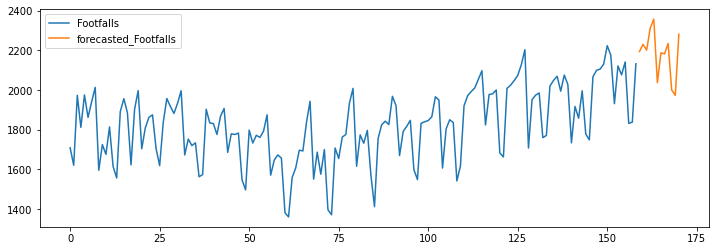

In [55]:
visualize[['Footfalls','forecasted_Footfalls']].reset_index(drop=True).plot(figsize=(12,4));

- All the forecasting models we made were almost similar to linear Regression.